## Team Pegasus
## Plexus

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/Test_dataset_ev_csv.csv")
df

,Day,Month,Hour,Minute,Class,Location
0,1,1,0,0,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
1,1,1,0,10,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
2,1,1,0,20,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
3,1,1,0,30,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
4,1,1,0,40,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
...,...,...,...,...,...,...
17275,30,4,23,10,HIGH,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."
17276,30,4,23,20,HIGH,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."
17277,30,4,23,30,HIGH,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."
17278,30,4,23,40,HIGH,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."


In [8]:
df.shape

(17280, 6)

In [9]:
df.columns

Index(['Day', 'Month', 'Hour', 'Minute', 'Class', 'Location'], dtype='object')

In [10]:
dfd = df.index[df['Location'] == "NDMC Parking, Outside Oriental Bank, Radial Road No. 7, Block M, Middle Circe, Connaught Place, New Delhi- 110001 "].tolist()
df = df.drop(dfd)


In [11]:
df['Location'].unique()

array(['Power House Rd, Block AD, Dakshini Pitampura, Pitam Pura, Delhi, 110034',
       'Bhalswa Dairy, Jahangirpura, New Delhi, 110045',
       'NDMC Parking, Outside Oriental Bank, Radial Road No. 7, Block M, Middle Circe, Connaught Place, New Delhi- 110001',
       'ICICI Bank parking, Kirti Mann Plaza, Sector 30 Noida'],
      dtype=object)

In [12]:
xcols=['Day','Month','Hour','Minute','Location']
y=df['Class']

In [13]:
x=df[xcols]

In [14]:
x

,Day,Month,Hour,Minute,Location
0,1,1,0,0,"Power House Rd, Block AD, Dakshini Pitampura, ..."
1,1,1,0,10,"Power House Rd, Block AD, Dakshini Pitampura, ..."
2,1,1,0,20,"Power House Rd, Block AD, Dakshini Pitampura, ..."
3,1,1,0,30,"Power House Rd, Block AD, Dakshini Pitampura, ..."
4,1,1,0,40,"Power House Rd, Block AD, Dakshini Pitampura, ..."
...,...,...,...,...,...
17275,30,4,23,10,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."
17276,30,4,23,20,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."
17277,30,4,23,30,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."
17278,30,4,23,40,"ICICI Bank parking, Kirti Mann Plaza, Sector 3..."


In [15]:
y

0        HIGH
1        HIGH
2        HIGH
3        HIGH
4        HIGH
         ... 
17275    HIGH
17276    HIGH
17277    HIGH
17278    HIGH
17279    HIGH
Name: Class, Length: 17279, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(x['Location'])
x['Location'] = label_encoder.transform(x['Location'])

<ipython-input-16-4763e5b2fc29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Location'] = label_encoder.transform(x['Location'])


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.28,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
y_pred=clf.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
clf.score(x_test, y_test)

0.700351312254598

In [20]:
clf.predict([[25,11,8,35,2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['HIGH'], dtype=object)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2099,  115,  270],
       [  13,   41,  452],
       [ 495,  105, 1249]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


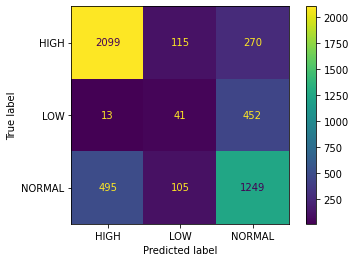

In [22]:
plot_confusion_matrix(clf, x_test, y_test)

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(128)).fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
y_pred=clf.predict(x_test)

In [25]:
clf.score(x_test, y_test)

0.8245505269683819

In [26]:
confusion_matrix(y_test,y_pred)

array([[2269,    3,  212],
       [   0,  416,   90],
       [ 296,  248, 1305]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


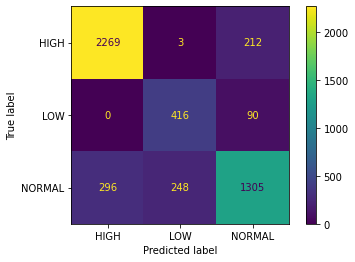

In [27]:
plot_confusion_matrix(clf, x_test, y_test)

In [28]:
clf.predict([[25,11,8,35,4]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['HIGH'], dtype='<U6')

In [29]:
import pickle

In [30]:
with open('model_pkl1', 'wb') as files:
    pickle.dump(clf, files)

In [31]:
with open('model_pkl1' , 'rb') as f:
    lr = pickle.load(f)

In [33]:
lr.predict([[25,11,8,35,4]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['HIGH'], dtype='<U6')